<a href="https://colab.research.google.com/github/AzlinRusnan/Analysis_of_Airlines_On_Time_Performance/blob/main/Analysis_of_Airline_On_Time_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction :**
This report provides an analysis of flight delays and cancellations for an airline. The goal is to understand the key factors causing these issues and suggest ways to improve. By examining various data points, we aim to provide clear insights and actionable recommendations to enhance flight punctuality and reliability. First, we cover the process of uploading a data file to HDFS, followed by analyzing the data using Pig, and finally, visualizing the results with Python packages.

##**Problem Statement :**
Frequent flight delays and cancellations affect the airline's operations and passenger satisfaction. Identifying the primary reasons behind these disruptions and finding solutions to minimize them is crucial for improving service quality and operational efficiency.

##**Objectives :**

1. Identify the main causes of flight delays and cancellations.

2. Determine the optimal times of the day, days of the week, and months of the year to minimize delays and cancellations.

3. Provide actionable recommendations to improve flight punctuality and reliability.


##**Basic Understanding of the Datasets :**

The source of the data is from https://www.kaggle.com/datasets/wenxingdi/data-expo-2009-airline-on-time-data/data?select=1993.csv

#### **There are 4 main datasets that we will use:**
- 2008.csv
- plane-data
- carriers
- airports

#### **The main questions of interest in the dataset:**
- What are the optimal times of day, days of the week, and times of the year for minimizing flight delays?
- What are the primary factors contributing to flight delays?
- What factors predominantly lead to flight cancellations?
- Which flight experiences the most frequent and significant delays and cancellations?

We will answer all the questions using Pig

##**Methodology :**

#### **Uploading Datasets to Hadoop File System**
Here are the steps to upload the datasets (2008, plane-data, carriers, and airports) to the Hadoop File System:

1. **Step 1: Transfer File to Virtual Machine**

 **Command Prompt:**

 image.png

 Explanation:

 In this step, the pscp command (PuTTY Secure Copy) is used to transfer the 2008.csv file from your local Windows machine (specified by the user file path) to the home directory of the user maria_dev on the virtual local machine. The file is now accessible in the virtual machine but not yet in the Hadoop file system.

2. **Step 2: Upload File to Hadoop File System**

 **Putty:**

 image.png

 Explanation:

 Here, the hdfs dfs -put command is used to move the 2008.csv file from the local file system of the virtual machine (where it resides in /home/maria_dev/) to the Hadoop Distributed File System (HDFS). The file is uploaded to the directory /user/maria_dev/flight_data/ in HDFS, making it available for processing by Hadoop.

#### **Learn Data Manipulation Using Pig**
1. #### **Data Loading:**

- Load datasets containing flight records, airport information, carrier details, and plane data into PIG.

 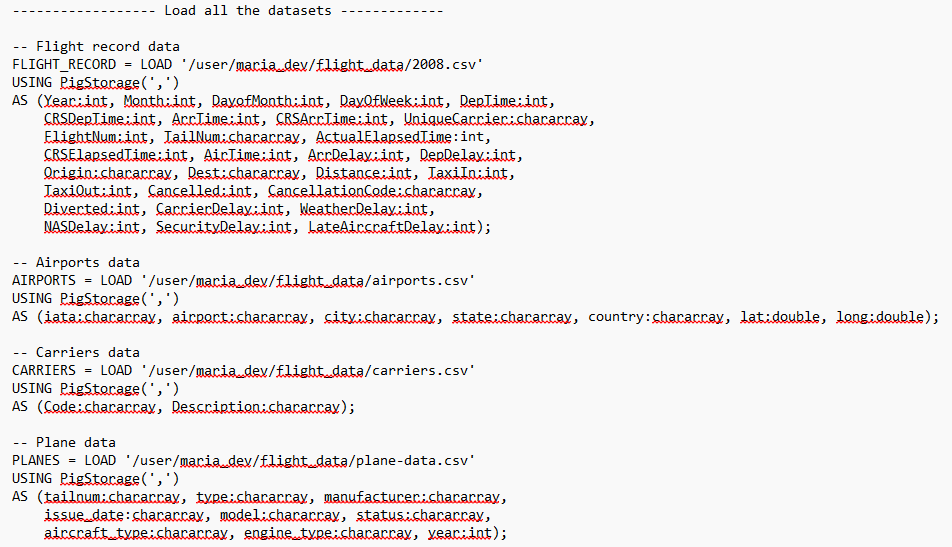

2. #### **Data Joining**
- Join the datasets on relevant keys to create a comprehensive dataset for analysis.

 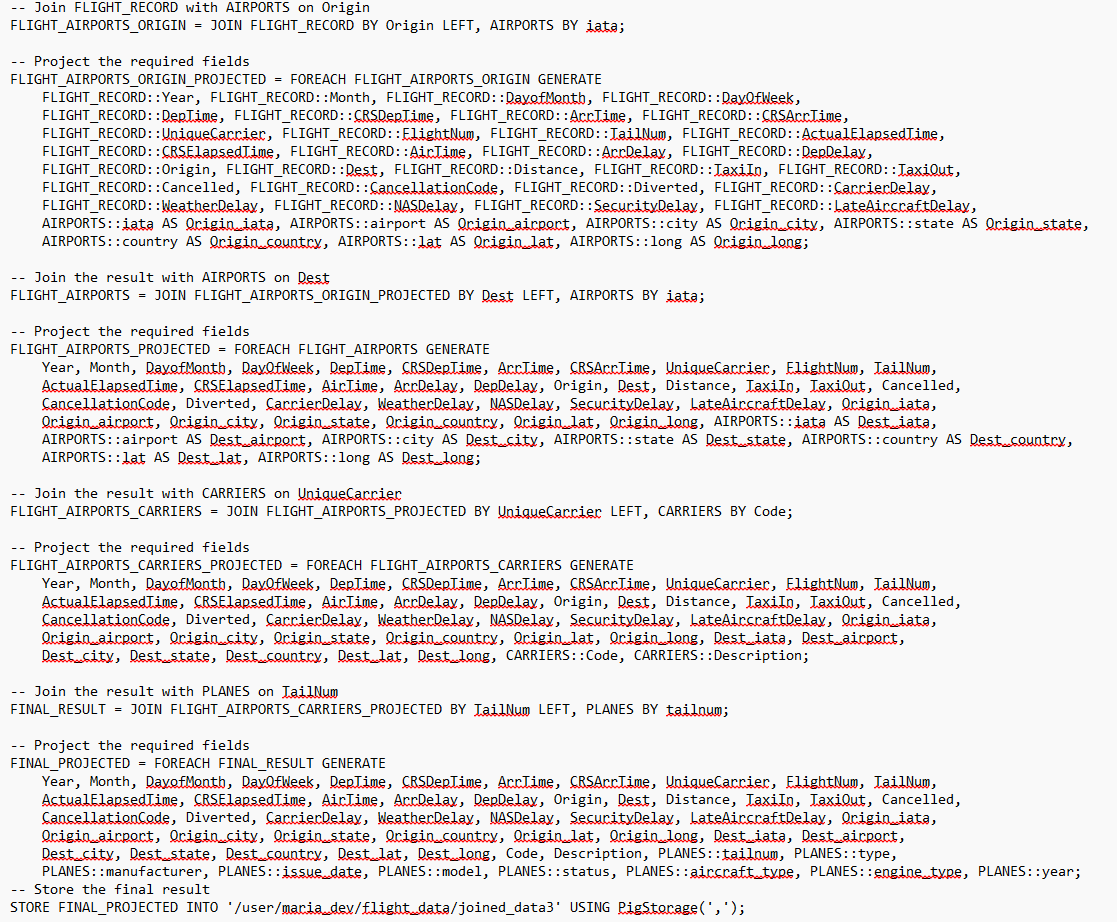

3. #### **Data Analysis**

 #### **Q1. What are the optimal times of day, days of the week, and times of the year for minimizing flight delays?**

  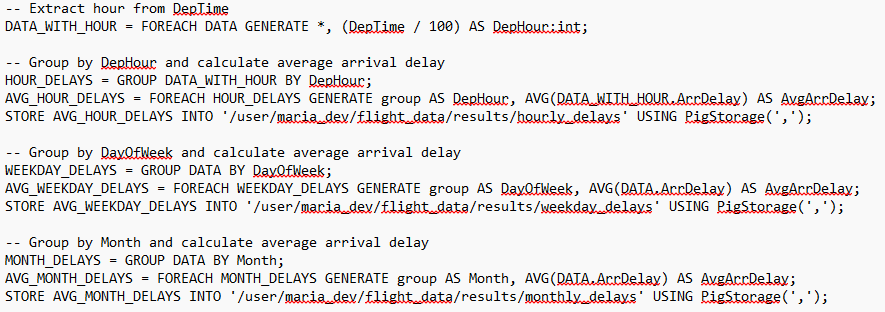

 #### **Q2. What are the primary factors contributing to flight delays?**
  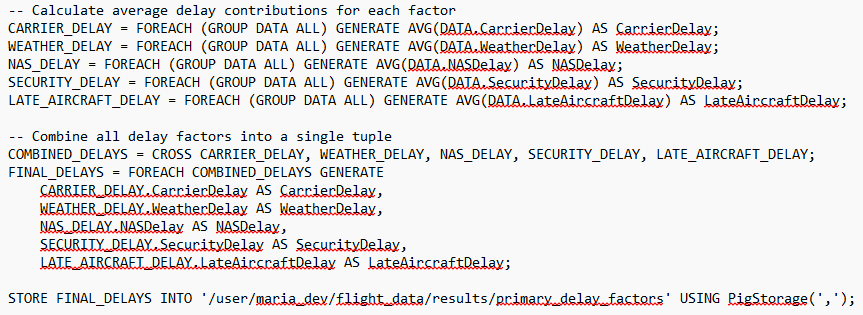

 #### **Q3. What factors predominantly lead to flight cancellations?**

  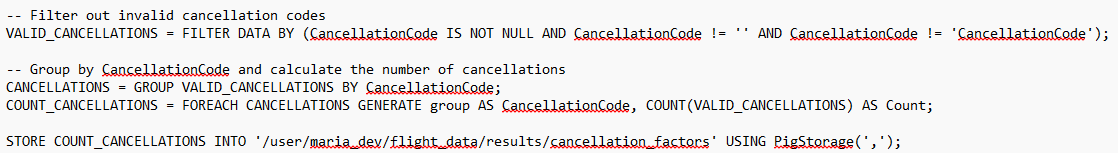

 #### **Q4. Which flight experiences the most frequent and significant delays and cancellations?**

  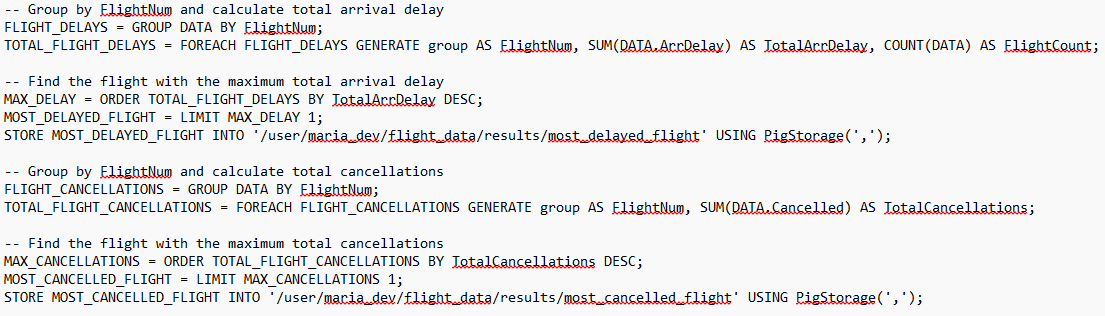

## **Findings and Visualizations :**

### **Q1. What are the optimal times of day, days of the week, and times of the year for minimizing flight delays?**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


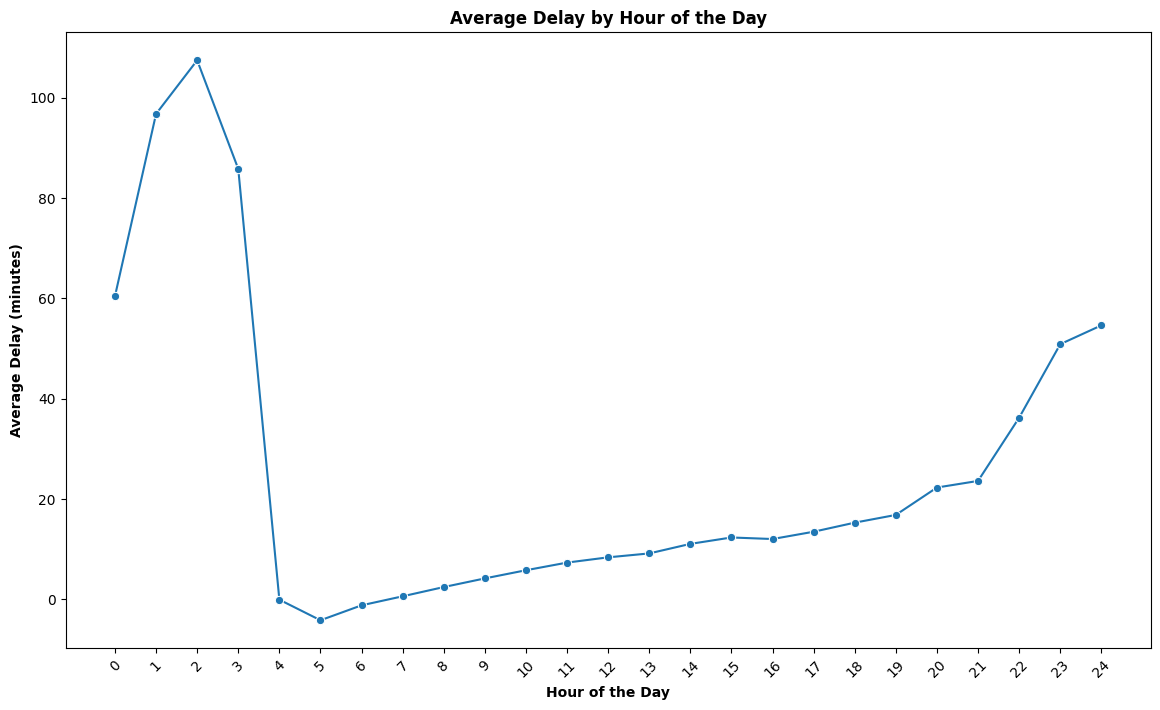

In [ ]:
# Optimal times of day for minimizing flight delays

file_path = '/content/gdrive/MyDrive/Data Management/hourly_delays'
hourly_delays = pd.read_csv(file_path, header=None, names=['DepHour', 'AvgArrDelay'])

# Clean the data by removing non-finite values in DepHour
hourly_delays = hourly_delays.dropna(subset=['DepHour'])
hourly_delays = hourly_delays[hourly_delays['DepHour'].apply(lambda x: pd.notnull(x) and x != float('inf') and x != float('-inf'))]

# Convert DepHour to integer to avoid float representation
hourly_delays['DepHour'] = hourly_delays['DepHour'].astype(int)

# Filter the data to include only hours from 0 to 23
hourly_delays = hourly_delays[hourly_delays['DepHour'] < 25]

# Plot the average arrival delay by hour as a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='DepHour', y='AvgArrDelay', data=hourly_delays, marker='o')
plt.title('Average Delay by Hour of the Day', weight='bold')
plt.xlabel('Hour of the Day', weight='bold')
plt.ylabel('Average Delay (minutes)', weight='bold')
plt.xticks(rotation=45)
plt.xticks(range(0, 25))
plt.show()

#### **Insights:**

1. **Early Morning Hours (3 AM - 8 AM):**

- The lowest average delays occur between 3 AM and 8 AM, with the average delay dropping to nearly zero around 4 AM to 5 AM. This indicates that flights scheduled during these hours are the least likely to experience significant delays.

2. **Gradual Increase in Delays (9 AM - 8 PM):**

- From 9 AM onwards, there is a gradual increase in average delays, reaching a steady rise around 3 PM to 8 PM. Although delays increase during these hours, they remain relatively moderate.

3. **Late Evening to Night (9 PM - 2 AM):**

- There is a significant increase in delays starting from 9 PM, peaking around midnight to 1 AM with average delays exceeding 100 minutes. Delays then gradually decrease again in the early morning hours.

#### **Recommendations:**


1. **Schedule Flights in Early Morning:**

- To minimize the risk of delays, scheduling flights during the early morning hours (3 AM to 8 AM) is optimal. This period consistently shows the lowest average delays.

2. **Avoid Late Night Flights:**

- Late night flights, particularly those scheduled around midnight to 1 AM, should be avoided if possible, as this period experiences the highest average delays.

3. **Monitor Midday to Evening Delays:**

- While delays during midday to evening hours (9 AM to 8 PM) are not as high as late-night delays, they gradually increase. It's beneficial to monitor and manage operations carefully during these times to reduce potential delays.

---



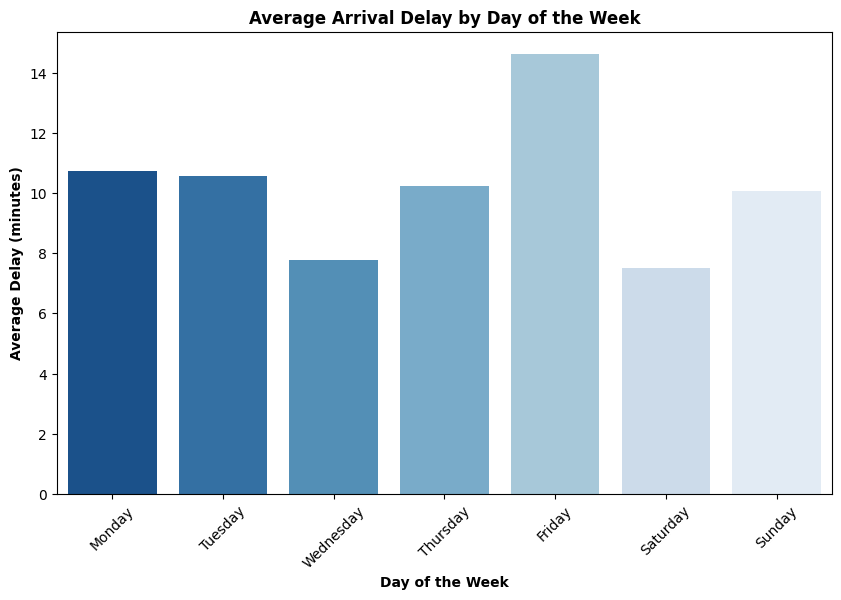

In [ ]:
# Optimal days of the week for minimizing flight delays

file_path = '/content/gdrive/MyDrive/Data Management/weekday_delays'
weekday_delays = pd.read_csv(file_path, header=None, names=['DayOfWeek', 'AvgArrDelay'])

# Map day numbers to day names
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
weekday_delays['Day'] = weekday_delays['DayOfWeek'].map(day_mapping)

# Plot the average arrival delay by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='AvgArrDelay', data=weekday_delays, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Blues_r')
plt.title('Average Arrival Delay by Day of the Week', weight='bold')
plt.xlabel('Day of the Week', weight='bold')
plt.ylabel('Average Delay (minutes)', weight='bold')
plt.xticks(rotation=45)
plt.show()

#### **Insights:**

1. **Wednesday as the Optimal Day:**

- **Observation:** Wednesday has the lowest average delay.
- **Implication:** Flights on Wednesdays are the least likely to experience significant delays, suggesting operational stability.

2. **Weekend Operations (Saturday and Sunday):**

- **Observation:** Saturday and Sunday also exhibit relatively low average delays.
- **Implication:** Weekend flights tend to face fewer delays, possibly due to lower traffic or more efficient scheduling.

3. **High Delay Day (Friday):**

- **Observation:** Friday has the highest average delay.
- **Implication:** This day is prone to congestion and operational bottlenecks, leading to increased delays.

4. **Moderate Delay Days (Monday, Tuesday, Thursday):**

- **Observation:** Monday and Tuesday have similar delays, higher than Wednesday, Saturday, and Sunday, but lower than Friday. Thursday also shows moderate delays.
- **Implication:** These days may be affected by cumulative delays from the beginning of the week or increased mid-week travel.

#### **Recommendation:**

1. **Optimizing Flight Schedules:**

- Schedule a higher volume of flights on Wednesdays, Saturdays, and Sundays to leverage the lower delay trends.
- Limit the number of flights on Fridays or allocate more buffer time between flights to accommodate potential delays.
- Implement flexible scheduling that can adjust based on real-time data and historical delay patterns.

2. **Collaboration with Airports and Authorities:**
- Work closely with air traffic control and airport authorities to manage congestion and optimize flight paths, particularly on high-delay days.

- Advocate for and invest in airport infrastructure improvements that can alleviate bottlenecks and enhance overall efficiency.

---

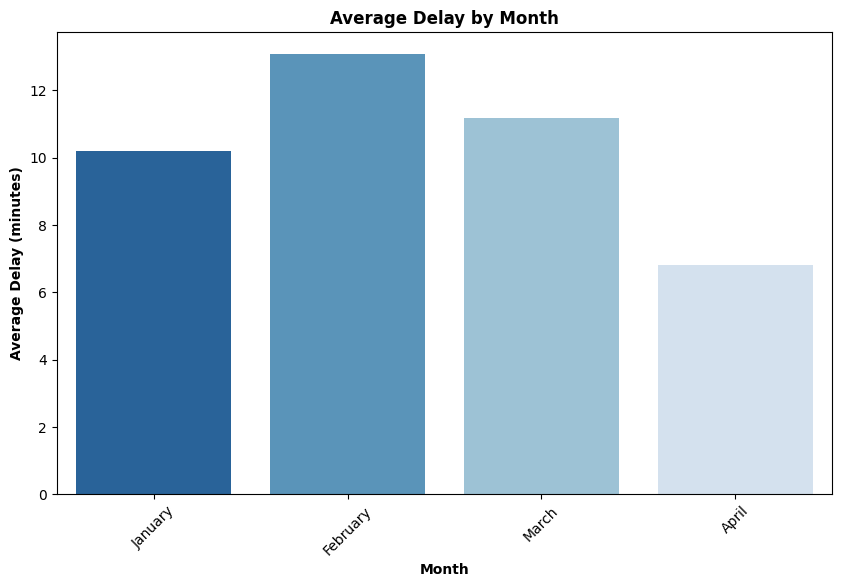

In [ ]:
# Optimal times of the year for minimizing flight delays

file_path = '/content/gdrive/MyDrive/Data Management/monthly_delays'
monthly_delays = pd.read_csv(file_path, header=None, names=['Month', 'AvgArrDelay'])

# Map month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_delays['MonthName'] = monthly_delays['Month'].map(month_mapping)

# Plot the average arrival delay by month
plt.figure(figsize=(10, 6))
sns.barplot(x='MonthName', y='AvgArrDelay', data=monthly_delays, order=[
    'January', 'February', 'March', 'April'], palette='Blues_r')
plt.title('Average Delay by Month', weight='bold')
plt.xlabel('Month', weight='bold')
plt.ylabel('Average Delay (minutes)', weight='bold')
plt.xticks(rotation=45)
plt.show()

#### **Insights:**

1. **Lowest Delay Month (April):**

- **Observation:** April has the lowest average delay.
- **Implication:** Flights in April are the least likely to experience significant delays, suggesting this is the optimal month for minimizing delays.

2. **High Delay Months (January, February, March):**

- **Observation:** February has the highest average delay, followed by January and March.
- **Implication:** These months are prone to higher delays, possibly due to weather conditions, increased travel demand, or operational challenges.

#### **Recommendation:**

1. **Schedule Optimization:**

- Increase flight schedules and volume in April to leverage the lower delay trends.
- Implement more conservative scheduling in January, February, and March to account for higher delay risks.

- Allocate additional buffer time between flights in high delay months to absorb potential delays without affecting following flights.

2. **Weather Preparedness:**

- Invest in advanced weather prediction technologies, especially for the winter months (January, February), to anticipate and mitigate weather-related delays.

- Develop and implement robust contingency plans for handling weather-related disruptions effectively.
---



### **Q2. What are the primary factors contributing to flight delays?**

In [ ]:
file_path = '/content/gdrive/MyDrive/Data Management/primary_delay_factors'
primary_delay_factors = pd.read_csv(file_path, header=None, names=['Carrier', 'Weather', 'National Air System', 'Security', 'Late Aircraft'])

# Display the first few rows to verify content
print(primary_delay_factors)


     Carrier   Weather  National Air System  Security  Late Aircraft
0  15.752957  2.938243            16.158462  0.080459       20.97671


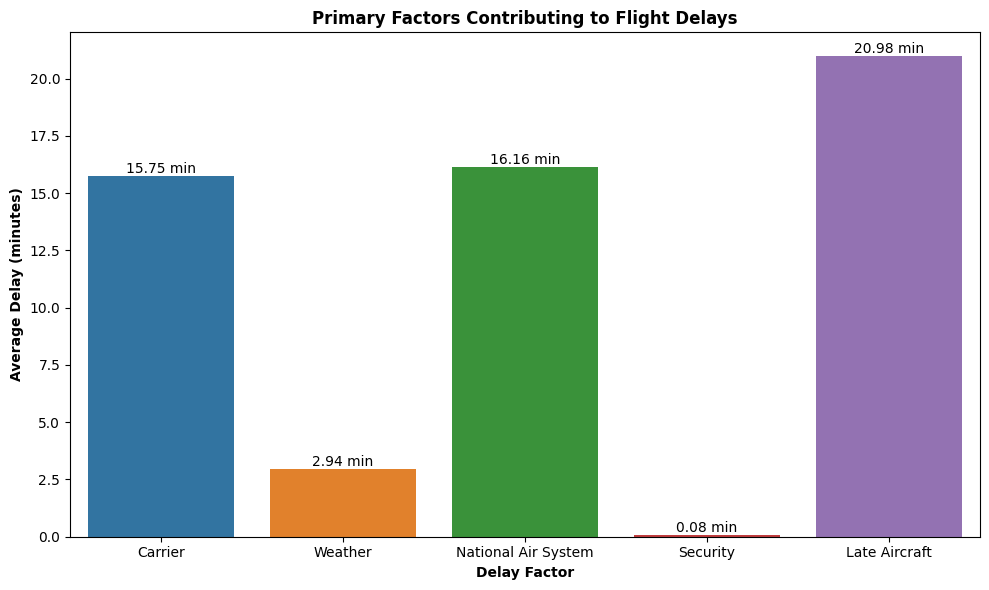

In [ ]:
# Calculate the average delay contributions
delay_factors = primary_delay_factors.mean()

# Convert the average delays to a DataFrame for plotting
delay_factors_df = delay_factors.reset_index()
delay_factors_df.columns = ['DelayType', 'AverageDelay']

# Colors for the bar plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Visualization for average delay factors
plt.figure(figsize=(10, 6))
g = sns.barplot(x='DelayType', y='AverageDelay', data=delay_factors_df, palette=colors)
plt.title('Primary Factors Contributing to Flight Delays', weight='bold')
plt.xlabel('Delay Factor', weight='bold')
plt.ylabel('Average Delay (minutes)', weight='bold')

# Annotate each bar with the average delay in minutes
for index, row in delay_factors_df.iterrows():
    avg_delay = round(row['AverageDelay'], 2)
    plt.text(x=index, y=row['AverageDelay'], s=f"{avg_delay} min", va='bottom', ha='center')

plt.tight_layout()
plt.show()

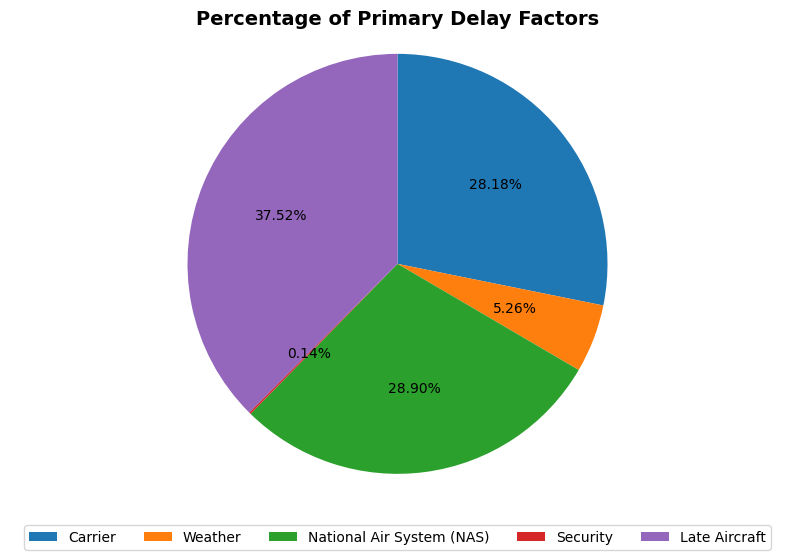

In [ ]:
# Calculate the average delay contributions
delay_factors = primary_delay_factors.mean()

# Convert the average delays to a DataFrame for plotting
delay_factors_df = delay_factors.reset_index()
delay_factors_df.columns = ['DelayType', 'AverageDelay']

# Calculate total delay for percentage calculation
total_delay = delay_factors_df['AverageDelay'].sum()

# Calculate percentage contributions
delay_factors_df['Percentage'] = (delay_factors_df['AverageDelay'] / total_delay) * 100

# Colors for the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(delay_factors_df['AverageDelay'], autopct='%.2f%%',
        startangle=90, counterclock=False, colors=colors, textprops={'color':'black'})

# Title
plt.title("Percentage of Primary Delay Factors", weight='bold', size=14)

# Legend
plt.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### **Insights:**

1. **Late Aircraft is the Leading Cause:**

- Aircraft delays are the main cause of both average and percentage delays. This implies that flights that arrive after their scheduled time seriously interfere with the schedule as a whole.

2. **National Air System (NAS) and Carrier-Related Delays:**

- Both NAS and carrier-related issues contribute substantially to delays. This indicates that systemic issues within the air traffic control system and airline operations themselves are key areas of concern.

3. **Weather and Security:**

- Although security and weather are factors, their influence is much less than that of the other factors. Even though they happen less frequently, weather-related delays can be more unpredictable and challenging to handle.

#### **Recommendation:**

1. **Improve Turnaround Time for Aircraft:**

- Airlines should focus on improving the effectiveness of their turnaround procedures in order to reduce aircraft delays. This could include more effective aircraft maintenance procedures, faster boarding procedures, and improved scheduling.



---



### **Q3. What factors predominantly lead to flight cancellations?**

In [ ]:
file_path = '/content/gdrive/MyDrive/Data Management/cancellation_factors'
cancellation_factors = pd.read_csv(file_path, header=None, names=['CancellationCode', 'Count'])

# Display the first few rows to verify content
print(cancellation_factors)

  CancellationCode  Count
0                A  26075
1                B  25744
2                C  12617
3                D      6


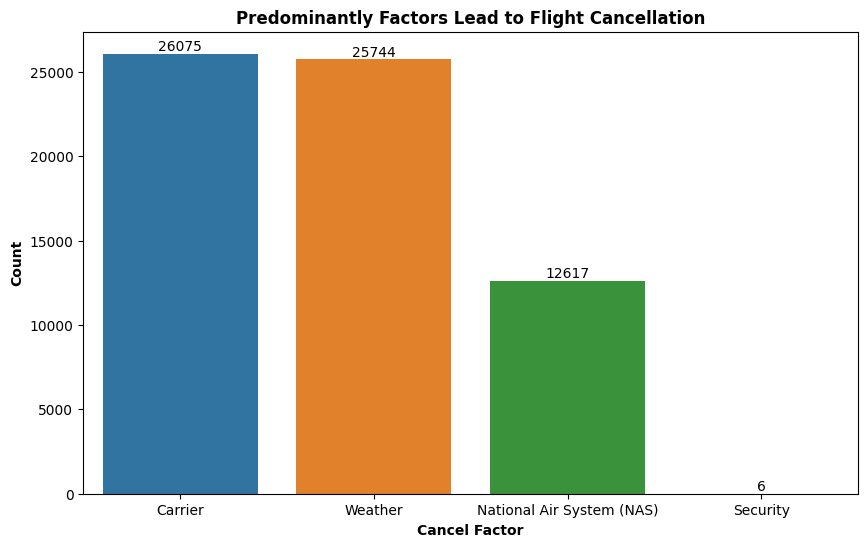

In [ ]:
# Since the cancellation code showing in the dataset in A,B,C and D, we mapped them as follow:
cancellation_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System (NAS)',
    'D': 'Security'
}

# Map the cancellation codes to descriptions
cancellation_factors['Description'] = cancellation_factors['CancellationCode'].map(cancellation_mapping)

# Visualization for cancellation reasons
plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='Count', data=cancellation_factors, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Predominantly Factors Lead to Flight Cancellation', weight='bold')
plt.xlabel('Cancel Factor', weight='bold')
plt.ylabel('Count', weight='bold')

# Annotate each bar with the count and percentage
total_cancellations = cancellation_factors['Count'].sum()
for bar in range(cancellation_factors.shape[0]):
    count = cancellation_factors['Count'].iloc[bar]
    pct = (count / total_cancellations) * 100
    pct = round(pct, 2)
    plt.text(x=bar, y=count, s=f"{count}", va='bottom', ha='center')

plt.show()

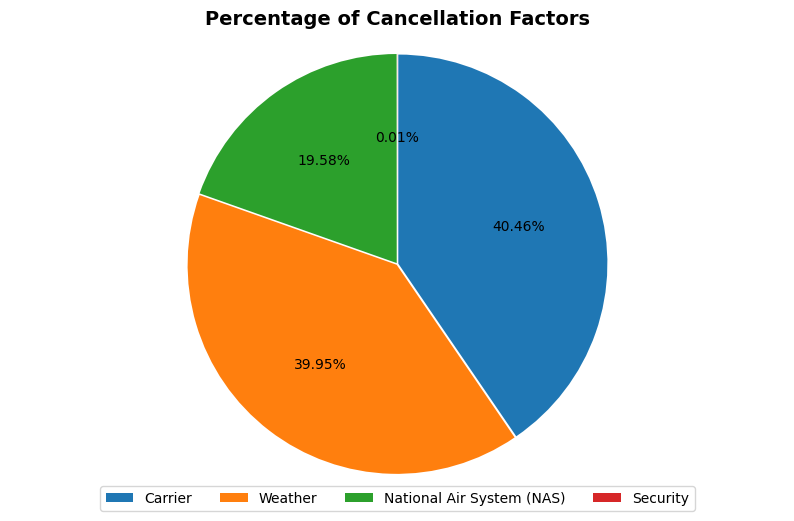

In [ ]:
# Map the cancellation codes to descriptions
cancellation_factors['Description'] = cancellation_factors['CancellationCode'].map(cancellation_mapping)

# Calculate the total delay to get the percentage
total_delay_sum = cancellation_factors['Count'].sum()
cancellation_factors['percentage'] = (cancellation_factors['Count'] / total_delay_sum) * 100

# Define colors, labels, and explode settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
labels = ['Carrier', 'Weather', 'National Air System (NAS)', 'Security']
explode = (0.005, 0.005, 0.005, 0.005)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(cancellation_factors['Count'], explode=explode, autopct='%.2f%%',
        startangle=90, counterclock=False, colors=colors, textprops={'color':'black'})

# Title
plt.title("Percentage of Cancellation Factors", weight='bold', size=14)

# Legend
plt.legend(labels, loc=8, bbox_to_anchor=(0.5, -0.05), ncol=4)

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### **Insights:**

1. **Carrier-Related Issues are the Leading Cause of Cancellations:**

- Carrier-related problems are the most significant factor, contributing to 40.46% of cancellations. This includes issues like mechanical problems, crew availability, and operational difficulties.

2. **Weather as a Major Contributor:**

- Weather-related cancellations account for 39.95% of the total, indicating that adverse weather conditions are nearly as impactful as carrier-related issues in causing flight cancellations.

3. **National Air System (NAS) Issues:**

- NAS-related cancellations, making up 19.58% of the total, indicate that problems within the air traffic control system or national airspace infrastructure also play a notable role in flight cancellations.

4. **Minimal Impact of Security Issues:**

- Security issues contribute minimally to flight cancellations, representing only 0.01% of the total. This suggests that while security is crucial, it is not a primary factor in flight cancellations.

#### **Recommendations:**

1. **Improving Operational Strategy:**

- In order to reduce cancellations caused by carriers, airlines should concentrate on strengthening their operational strategy. Improved crew management systems, stronger backup plans, and better maintenance schedules are a few examples of this.

2. **Invest in Weather Prediction and Adaptation:**

- To address weather-related cancellations, airlines can invest in advanced weather prediction technologies and develop flexible scheduling strategies that allow for rapid adaptation to changing weather conditions.


---



### **Q4. Which flight experiences the most frequent and significant delays and cancellations?**

In [ ]:
# Most Frequent and Significant Delays
file_path = '/content/gdrive/MyDrive/Data Management/most_delayed_flight'
most_delayed_flight = pd.read_csv(file_path, header=None, names=['FlightNum', 'TotalArrDelay', 'Count'])

# Display the first few rows to verify content
print(most_delayed_flight,"\n")

   FlightNum  TotalArrDelay  Count
0        378          26683   1420 



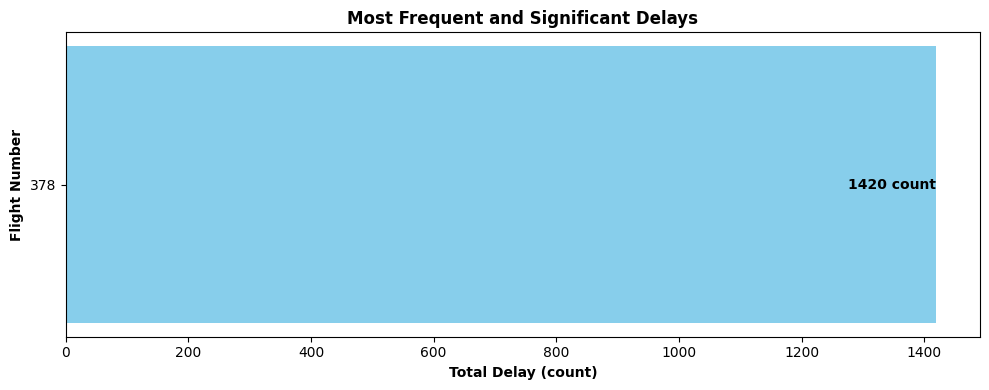

In [ ]:
# Ensure data is valid and does not have extreme values
most_delayed_flight = most_delayed_flight[most_delayed_flight['Count'] < 100000]  # Adjust threshold as necessary

# Visualization for the most delayed flight
plt.figure(figsize=(10, 4))  # Adjust height to make it horizontal
plt.barh(y=most_delayed_flight['FlightNum'].astype(str), width=most_delayed_flight['Count'], color='skyblue')
plt.title('Most Frequent and Significant Delays', weight='bold')
plt.xlabel('Total Delay (count)', weight='bold')
plt.ylabel('Flight Number', weight='bold')

# Annotate the bar with the delay count
for index, value in enumerate(most_delayed_flight['Count']):
    plt.text(value, index, f'{value} count', va='center', ha='right', color='black', weight='bold')

plt.tight_layout()
plt.show()

#### **Insights:**

1. Flight number 378 has the most significant delays with a total count of 1420.

2. This flight is a critical concern and requires targeted attention to address and reduce the delays.

#### **Recommendation:**

1. Conduct a comprehensive root cause analysis to identify the specific reasons behind the significant delays for flight number 378. Factors to investigate include operational issues, aircraft maintenance, crew scheduling, and external factors like weather and air traffic control delays.

2. Gather and analyze detailed data on each instance of delay for this flight to uncover patterns and common issues.


---



In [ ]:
# Most Frequent Cancellations
file_path = '/content/gdrive/MyDrive/Data Management/most_cancelled_flight'
most_cancelled_flight = pd.read_csv(file_path, header=None, names=['FlightNum', 'TotalCancellations'])

# Display the first few rows to verify content
print(most_cancelled_flight,"\n")

   FlightNum  TotalCancellations
0       5886                  70 



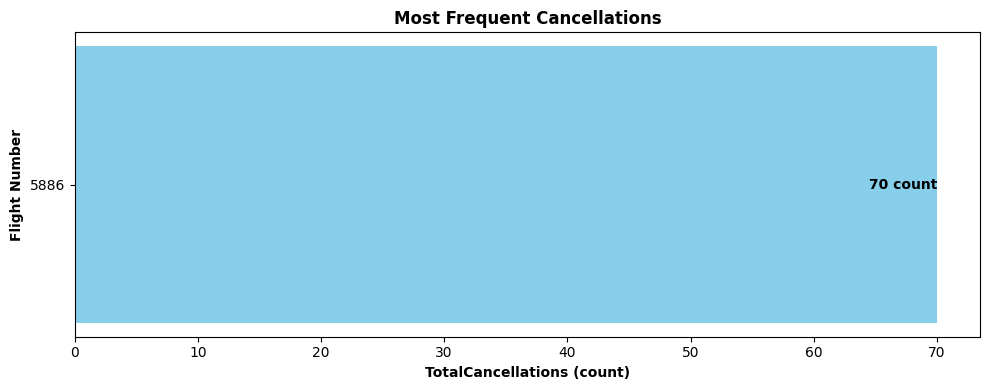

In [ ]:
# Ensure data is valid and does not have extreme values
#most_cancelled_flight = most_cancelled_flight[most_cancelled_flight['Count'] < 100000]  # Adjust threshold as necessary

# Visualization for the most delayed flight
plt.figure(figsize=(10, 4))  # Adjust height to make it horizontal
plt.barh(y=most_cancelled_flight['FlightNum'].astype(str), width=most_cancelled_flight['TotalCancellations'], color='skyblue')
plt.title('Most Frequent Cancellations', weight='bold')
plt.xlabel('TotalCancellations (count)', weight='bold')
plt.ylabel('Flight Number', weight='bold')

# Annotate the bar with the delay count
for index, value in enumerate(most_cancelled_flight['TotalCancellations']):
    plt.text(value, index, f'{value} count', va='center', ha='right', color='black', weight='bold')

plt.tight_layout()
plt.show()

#### **Insights:**

1. Flight with the most cancellation is flight number 5886 with 70 count of total cancellations.

2. This flight is experiencing frequent cancellations, indicating systemic issues that need to be addressed to improve reliability.

#### **Recommendation:**

1. Conduct a comprehensive root cause analysis to identify the specific reasons behind the frequent cancellations for flight number 378. Examine factors such as operational constraints, aircraft availability, crew scheduling issues, and external influences like weather conditions.

2. Collect and analyze data on each cancellation instance to identify patterns and recurring issues that contribute to these cancellations.

---



##**Conclusion :**
From the above findings, after investigating and plotting, we deduced that:

The most significant factor contributing to flight delays is late aircraft, accounting for 37.52% of total delays, with an average delay of 20.98 minutes. Improving aircraft turnaround times and maintenance efficiency is necessary to address this issue. National Air System (NAS) issues are responsible for 28.90% of delays, averaging 16.16 minutes. Enhancing air traffic management and collaboration with air traffic control can help mitigate these delays.

Carrier issues are the leading cause of cancellations, accounting for 40.46% of total cancellations. Improving operational strategies and resource allocation can help mitigate these cancellations. Weather is responsible for 39.95% of cancellations. Advanced weather prediction and proactive planning are necessary to handle weather-related cancellations effectively.

The early morning hours (3 AM - 8 AM) have the lowest average delays, making them the optimal times for scheduling flights. Late night hours (9 PM - 2 AM) experience the highest delays and should be avoided for critical flights. Wednesday, Saturday, and Sunday have the lowest average delays, making them the best days of the week for scheduling flights. Friday has the highest delays and should be managed carefully. April has the lowest average delays, making it the optimal month for scheduling flights. February, January, and March have the highest delays, so scheduling fewer flights during these months can improve performance.

Flight 378 experiences the most significant delays, with 1420 counts. While Flight 5886 has the highest number of cancellations, with 70 counts. How to overcome this delays and cancellations? By addressing the underlying issues through root cause analysis, optimizing scheduling and improving maintanence and communicatuon are necessary.

By addressing these factors through targeted strategies, the airline can significantly reduce flight delays and cancellations, leading to improved operational performance, enhanced service quality and higher passenger satisfaction. Implementing these recommendations will help the airline maintain a competetive edge in the industry.


####**Reference:**
Carlson, H. (2009, October 14). Data Expo 2009: Airline on-time performance analysis. Medium. https://carlson-hoo.medium.com/data-expo-2009-airline-on-time-performance-analysis-bb2e5bcf3042
